In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fatiguelife

import os, glob

In [2]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [11]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv'))

In [8]:
data_f = samples.drop(['Observed', 'NDE_cyle'], axis=1)

### Plotting

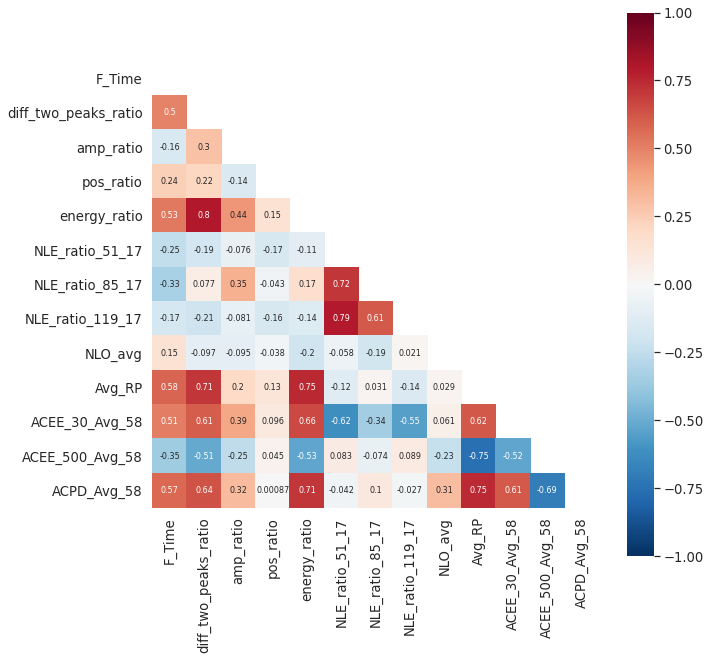

In [9]:
plot_corr(data_f, figsize=(10,10))

In [ ]:
sns.set_style('white')
sns.pairplot(data.drop('Observed', axis=1), hue='NDE_cyle')

In [10]:
data.drop('Observed', axis=1).columns[1:]

Index(['NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_119_17', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

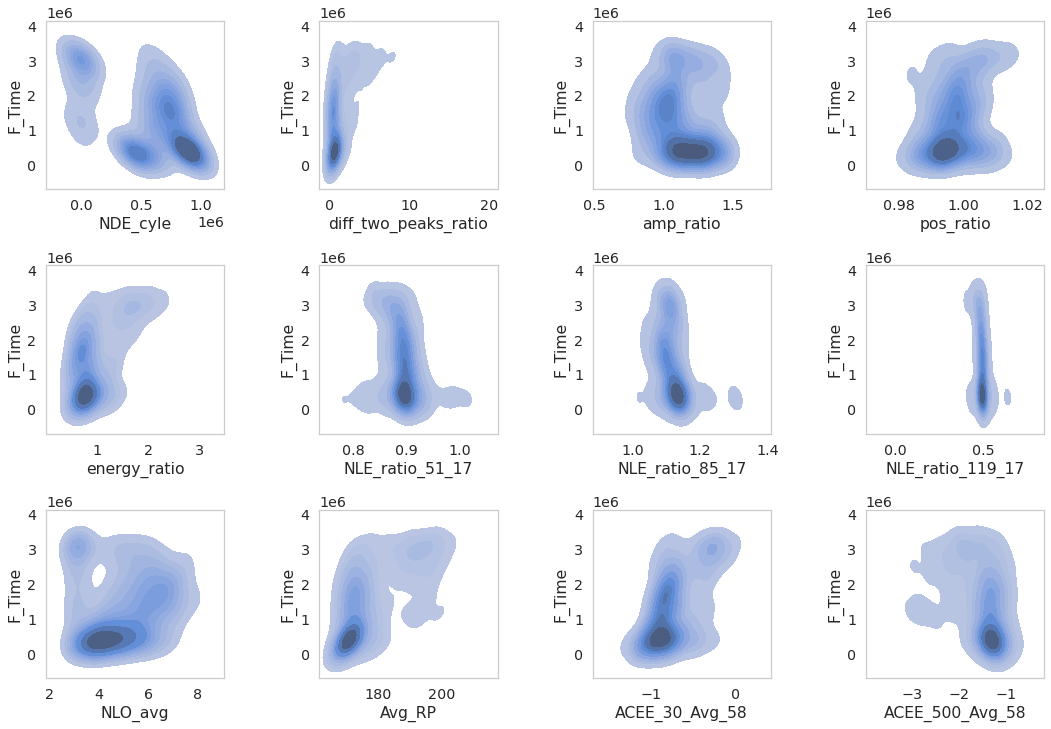

In [21]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(3, 4,  sharex=False, sharey=False, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop('Observed', axis=1).columns[1:]):
    
    sns.kdeplot(x=col, y='F_Time', data=data, fill=True, ax=ax)

In [16]:
test = pd.melt(data_f, 
               id_vars=['F_Time'])

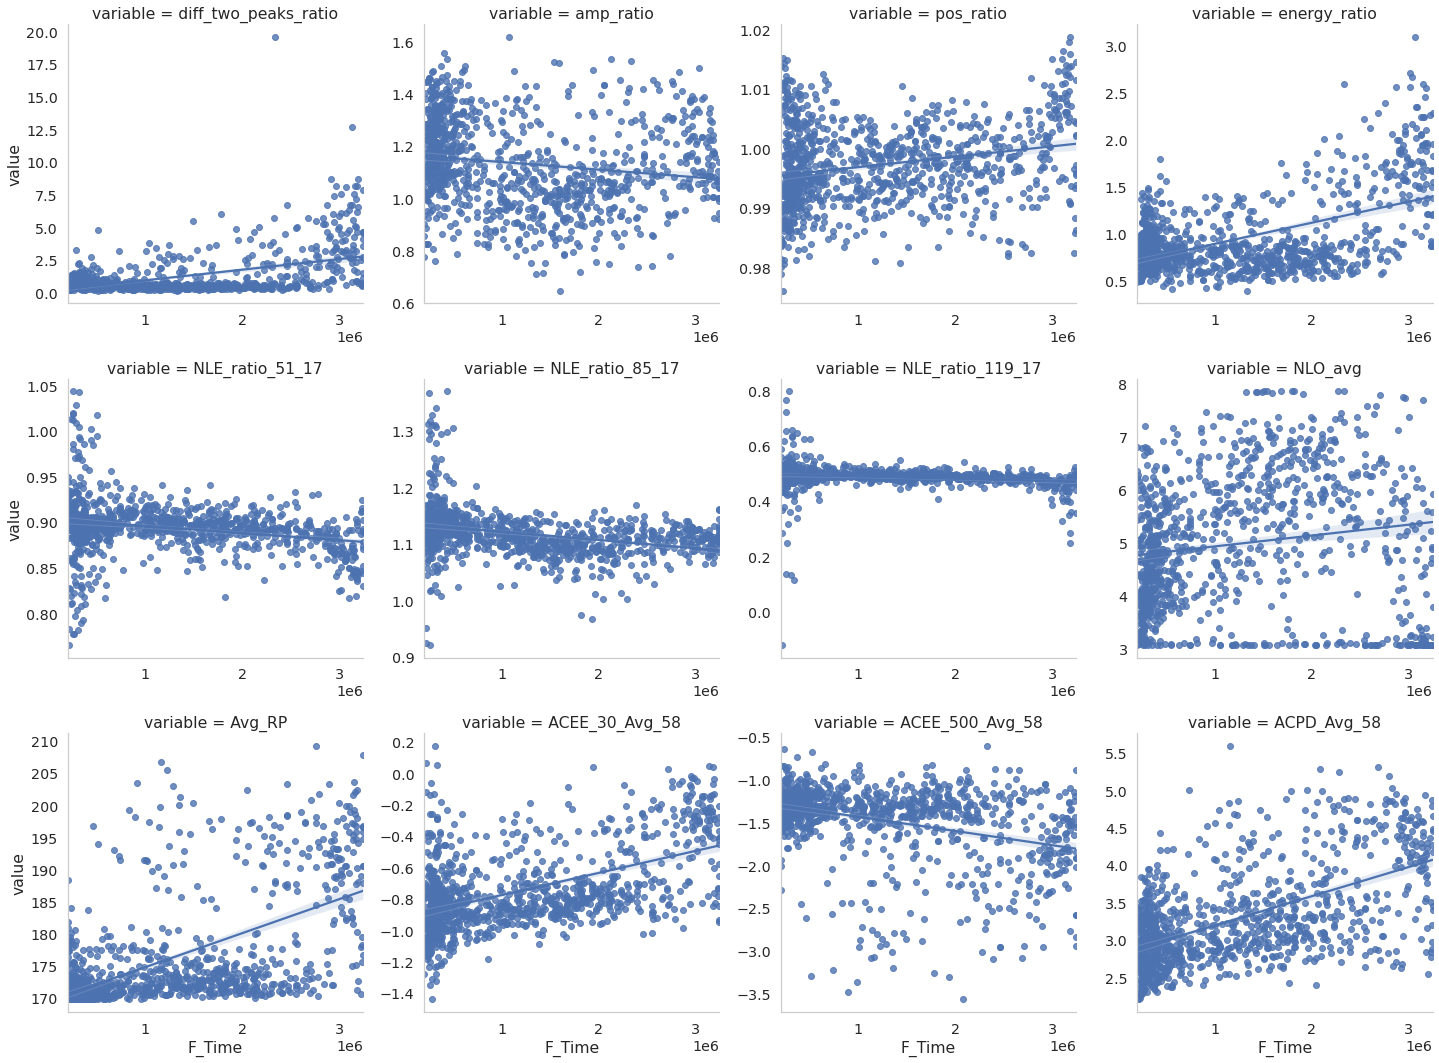

In [17]:
sns.lmplot(x='F_Time', y='value', data=test, 
           col='variable', col_wrap=4,
           sharey=False, sharex=False)

In [27]:
data.head()

,Observed,F_Time,NDE_cyle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
0,False,1.751191e+06,600000,0.529909,1.091504,0.993960,0.848464,0.917375,1.112056,0.505540,5.432829,174.266786,-0.847639,-1.340496,3.276437
1,False,8.805501e+05,750000,0.196585,0.849821,0.994489,0.505600,0.910996,1.116821,0.497770,6.898934,171.325300,-0.893297,-1.712179,3.106521
2,True,3.848121e+05,900000,0.384845,1.077153,1.000971,0.708655,0.878908,1.130553,0.487624,3.948716,170.217690,-0.764145,-1.190668,2.559568
3,True,1.194672e+06,0,2.474125,1.338242,0.995126,1.308626,0.895148,1.132818,0.487866,6.884989,188.904421,-0.476904,-2.805754,4.676679
4,True,7.445108e+05,900000,0.437564,1.039553,1.007743,0.721039,0.894121,1.163510,0.495600,5.466000,171.473636,-0.947583,-1.325563,2.553673


In [61]:
c, loc, scale = fatiguelife.fit(data.F_Time)
c, loc, scale

(101.54447157982034, 200006.99692848287, 101.95988551812076)

In [65]:
fatiguelife.rvs(c, loc, scale)

361633.8888113228

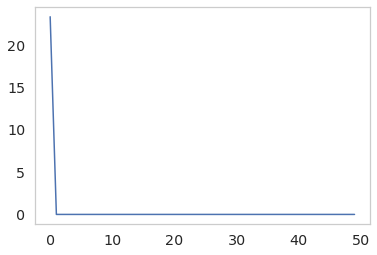

In [105]:
plt.plot(fatiguelife.pdf(np.linspace(200007, 361633), c, loc, scale))

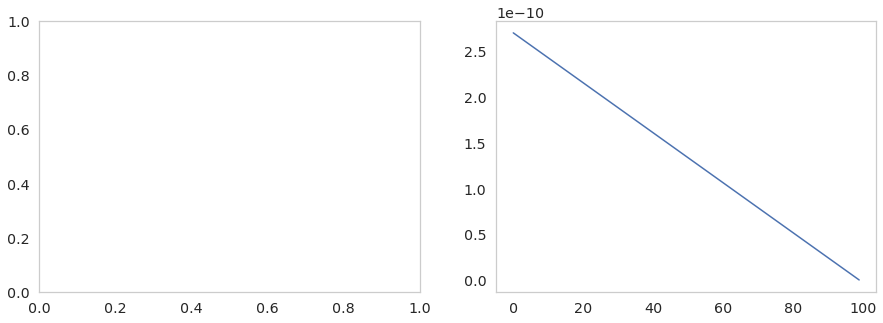

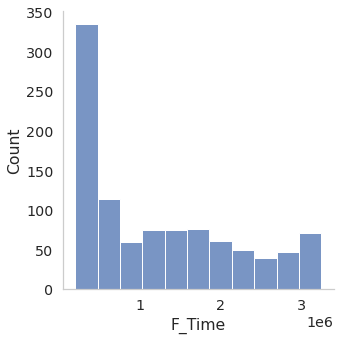

In [92]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axaxes[0] = plt.plot(np.linspace(fatiguelife.pdf(200007, c), fatiguelife.pdf(3245267, c), 100))

axes[1] = sns.displot(x=data['F_Time'], kind='hist')

<AxesSubplot:xlabel='F_Time', ylabel='Density'>

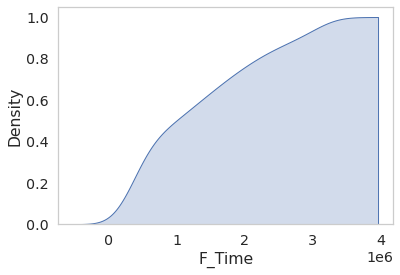

In [30]:
sns.kdeplot(x=data['F_Time'], shade=True, cumulative=True)

In [ ]:
np.linspace(fatiguelife.ppf(0.01, c)